
# Índice del Proyecto de Recuperación de Oro

- [1. Preparación de Datos](#1-preparación-de-datos)
- [2. Análisis Exploratorio de Datos](#2-análisis-exploratorio-de-datos)
- [3. Modelado Predictivo](#3-modelado-predictivo)
- [4. Conclusiones](#4-conclusiones)

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

Importacion de librerias necesarias.

## 1. Preparación de Datos

In [6]:
#data_full = pd.read_csv('./gold_recovery_full.csv')
#data_test = pd.read_csv('./gold_recovery_test.csv')
#data_train = pd.read_csv('./gold_recovery_train.csv')

data_full = pd.read_csv('/datasets/gold_recovery_full.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')

Importacion de datos

In [7]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


Análisis general de datos importados.

In [10]:
numerador = data_train['rougher.output.concentrate_au'] * (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])
denominador = data_train['rougher.input.feed_au'] * (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au'])
own_recovery = (numerador / denominador) * 100

Comprobación de calculo de recuperación a través de la formula de recuperación.

In [11]:
pd.DataFrame({
    "own_recovery":own_recovery,
    "rougher.output.recovery ": data_train["rougher.output.recovery"]
})

,own_recovery,rougher.output.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
16855,89.574376,89.574376
16856,87.724007,87.724007
16857,88.890579,88.890579
16858,89.858126,89.858126


In [12]:
rougher_eam =(data_train["rougher.output.recovery"] - own_recovery).abs().mean()

In [13]:
rougher_eam


9.303415616264301e-15

In [14]:
0.000000000000009303415616264301

9.303415616264301e-15

In [15]:
columnas_faltantes_test = data_train.columns[~data_train.columns.isin(data_test.columns)]

In [16]:
data_train[columnas_faltantes_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                                16794 non-null  float64


Visualización de columnas faltantes en el conjunto de prueba

In [17]:
data_full.isnull().mean().sort_values(ascending=False).head(10)


rougher.output.recovery               0.137304
rougher.output.tail_ag                0.120488
rougher.output.tail_au                0.120444
rougher.output.tail_sol               0.120444
rougher.input.floatbank11_xanthate    0.099357
secondary_cleaner.output.tail_sol     0.097508
final.output.recovery                 0.086415
rougher.calculation.au_pb_ratio       0.071624
primary_cleaner.input.sulfate         0.070831
primary_cleaner.input.depressant      0.068058
dtype: float64

In [18]:
data_train.dropna(how='any',inplace=True)
data_test.dropna(how='any',inplace=True)
data_full.dropna(how='any',inplace=True)

Preprocesamiento de datos, cambiando datos nulos a etiquetas any.

In [19]:
print(data_train.shape)
print(data_test.shape)
print(data_full.shape)

(11017, 87)
(5383, 53)
(16094, 87)


Vista general de distribución de datos.

## 2. Análisis Exploratorio de Datos

In [20]:
caracteristicas = ['rougher.input.feed_','rougher.output.concentrate_','primary_cleaner.output.concentrate_','final.output.concentrate_']
metales = ["au","ag","pb"]

Preparación de las carácteristicas y metales.

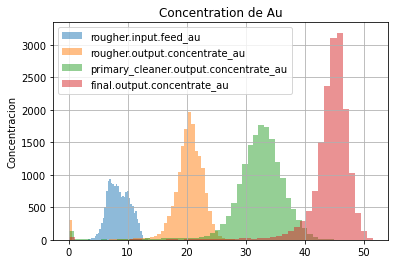

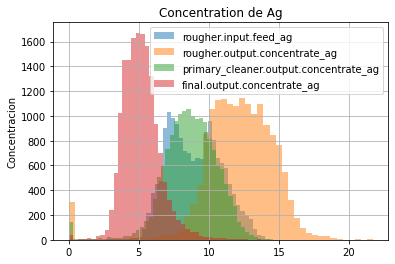

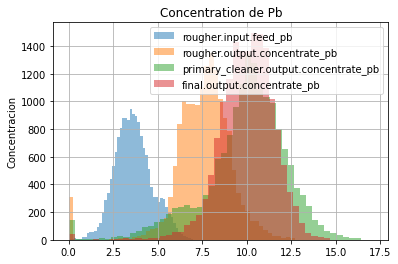

In [21]:
for m in metales:
    for c in caracteristicas:
        variable = c + m 
        data_full[variable].hist(bins=50,alpha =0.5,label=variable)
    plt.legend()
    plt.title(f"Concentration de {m.capitalize()}")
    plt.ylabel("Concentracion")
    plt.show()

Visualización de la tranformación del oro de acuerdo al metal adherido.


## 3. Modelado Predictivo

In [22]:
data_test = data_full[data_full['date'].isin(data_test['date'])]

In [23]:
targets = ['rougher.output.recovery', 'final.output.recovery']
features = data_test.drop(columns=["date"] + targets).columns.values

In [24]:
features_train = data_train[features].reset_index(drop=True)
target_train = data_train[targets].reset_index(drop=True)


In [25]:
def smape(y_true, y_pred):
    return np.mean( np.abs(y_pred - y_true) / ((np.abs(y_pred) + np.abs(y_true))/2)) * 100

Elaboración de la función para calcular sMAPE

In [26]:
kf = KFold(n_splits=5)
scores = []

for i , (train_index,test_index) in enumerate (kf.split(features_train)):
    # Subconjuntos de train 
    X_train = features_train.loc[train_index]
    y_train = target_train.loc[train_index]
    # subconjunto de test 
    X_test = features_train.loc[test_index]
    y_test = target_train.loc[test_index]
    modelo = LinearRegression()
    modelo.fit(X_train,y_train)
    resultados = {}
    resultados ["score"] = modelo.score(X_test,y_test)
    estimaciones = modelo.predict(X_test)
    resultados["smape_rougher_k"] = smape(y_test["rougher.output.recovery"],estimaciones[:,0])
    resultados["smape_final_k"] = smape(y_test["final.output.recovery"],estimaciones[:,1])
    scores.append(resultados)
resultados = pd.DataFrame(scores)
resultados ["smape25"] = resultados["smape_rougher_k"] * .25
resultados ["final75"] = resultados["smape_final_k"] * .75

resultados["smape_final"] = resultados["smape25"] + resultados["final75"]
display(resultados)
resultados.mean()
    

,score,smape_rougher_k,smape_final_k,smape25,final75,smape_final
0,0.708529,6.196518,5.149150,1.549129,3.861862,5.410992
1,0.790882,5.245601,2.730364,1.311400,2.047773,3.359173
2,0.128082,7.998735,3.842552,1.999684,2.881914,4.881598
3,0.815590,13.494144,4.149475,3.373536,3.112106,6.485642
4,0.583011,9.273781,4.759874,2.318445,3.569905,5.888351


score              0.605219
smape_rougher_k    8.441756
smape_final_k      4.126283
smape25            2.110439
final75            3.094712
smape_final        5.205151
dtype: float64

In [27]:
# RF Regressor

kf = KFold(n_splits=5)

scores = []

for i, (train_index, test_index) in enumerate(kf.split(features_train)):
  # Subconjuntos de train
  X_train = features_train.loc[train_index]
  y_train = target_train.loc[train_index]
  # Subcojuntos de test
  X_test = features_train.loc[test_index]
  y_test = target_train.loc[test_index]

  # Entrenar el modelo
  modelo = RandomForestRegressor(n_estimators=2)
  modelo.fit(X_train, y_train)

  # Guardar scores
  resultados = {}

  resultados["score"] = modelo.score(X_test,y_test)
  estimaciones = modelo.predict(X_test)

  resultados["smape_rougher_k"] = smape(y_test["rougher.output.recovery"],  estimaciones[:,0])
  resultados["smape_final_k"] = smape(y_test["final.output.recovery"],  estimaciones[:,1])

  scores.append(resultados)

resultados = pd.DataFrame(scores)
resultados["smape25"] = resultados["smape_rougher_k"] * .25
resultados["final75"] = resultados["smape_final_k"] * .75

resultados["smape_final"] = resultados["smape25"] + resultados["final75"]
display(resultados)
resultados.mean()

,score,smape_rougher_k,smape_final_k,smape25,final75,smape_final
0,0.652379,3.197673,5.798038,0.799418,4.348529,5.147947
1,0.849740,2.825141,3.643945,0.706285,2.732958,3.439244
2,0.772750,1.680221,3.739077,0.420055,2.804307,3.224363
3,0.787201,1.980165,5.088594,0.495041,3.816445,4.311487
4,0.680723,3.376907,4.429148,0.844227,3.321861,4.166088


score              0.748559
smape_rougher_k    2.612021
smape_final_k      4.539760
smape25            0.653005
final75            3.404820
smape_final        4.057826
dtype: float64

## 4. Conclusiones

En mi análisis de datos para la recuperación de oro, seguí un proceso estructurado que comenzó con la importación y limpieza de datos. Me aseguré de que la fórmula de recuperación del oro fuera correcta, lo que estableció una base sólida para mi análisis.

Al examinar las concentraciones de metales, confirmé que aumentaban en cada etapa del proceso, lo cual es un indicador de éxito en la purificación. Luego, preparé los datos para el modelado, eliminando las filas con valores faltantes y alineando los conjuntos de datos de prueba y entrenamiento.

Implementé dos modelos predictivos: regresión lineal y Random Forest. A través de la validación cruzada, descubrí que el Random Forest superó significativamente a la regresión lineal, indicado por un sMAPE más bajo y consistente. Esto resaltó la eficacia de los métodos de ensamble sobre los modelos lineales para este tipo de datos.

Este ejercicio reforzó mi comprensión del valor de las pruebas iterativas de modelos y métricas de rendimiento adaptadas a los problemas específicos. Los resultados han sido un testimonio de la importancia de la selección del modelo en la ciencia de datos y me han proporcionado insights claros para mejorar las estrategias de extracción de oro.